In [20]:
from IPython import get_ipython
from IPython.display import display
# %%
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load the dataset
df = pd.read_csv('car.csv')

In [14]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Shape: (1728, 7)

First few rows of the dataset:
  Buying_Price Maintenance_Price No_of_Doors Person_Capacity Size_of_Luggage  \
0        vhigh             vhigh           2               2           small   
1        vhigh             vhigh           2               2           small   
2        vhigh             vhigh           2               2           small   
3        vhigh             vhigh           2               2             med   
4        vhigh             vhigh           2               2             med   

  Safety Car_Acceptability  
0    low             unacc  
1    med             unacc  
2   high             unacc  
3    low             unacc  
4    med             unacc  


In [15]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Buying_Price         0
Maintenance_Price    0
No_of_Doors          0
Person_Capacity      0
Size_of_Luggage      0
Safety               0
Car_Acceptability    0
dtype: int64


In [16]:
# Check the data types and summary statistics
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Buying_Price         object
Maintenance_Price    object
No_of_Doors          object
Person_Capacity      object
Size_of_Luggage      object
Safety               object
Car_Acceptability    object
dtype: object


In [17]:
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
       Buying_Price Maintenance_Price No_of_Doors Person_Capacity  \
count          1728              1728        1728            1728   
unique            4                 4           4               3   
top           vhigh             vhigh           2               2   
freq            432               432         432             576   

       Size_of_Luggage Safety Car_Acceptability  
count             1728   1728              1728  
unique               3      3                 4  
top              small    low             unacc  
freq               576    576              1210  


In [18]:
# Check class distribution
print("\nClass distribution:")
print(df['Car_Acceptability'].value_counts())
print(df['Car_Acceptability'].value_counts(normalize=True) * 100)


Class distribution:
Car_Acceptability
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
Car_Acceptability
unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: proportion, dtype: float64


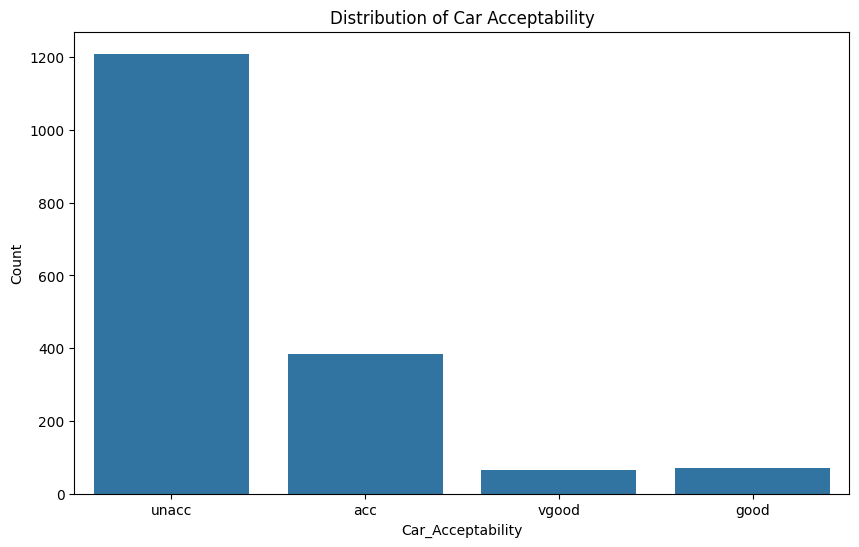

In [21]:
##Data Exploration--------------------------------
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Car_Acceptability', data=df)
plt.title('Distribution of Car Acceptability')
plt.ylabel('Count')
plt.show()


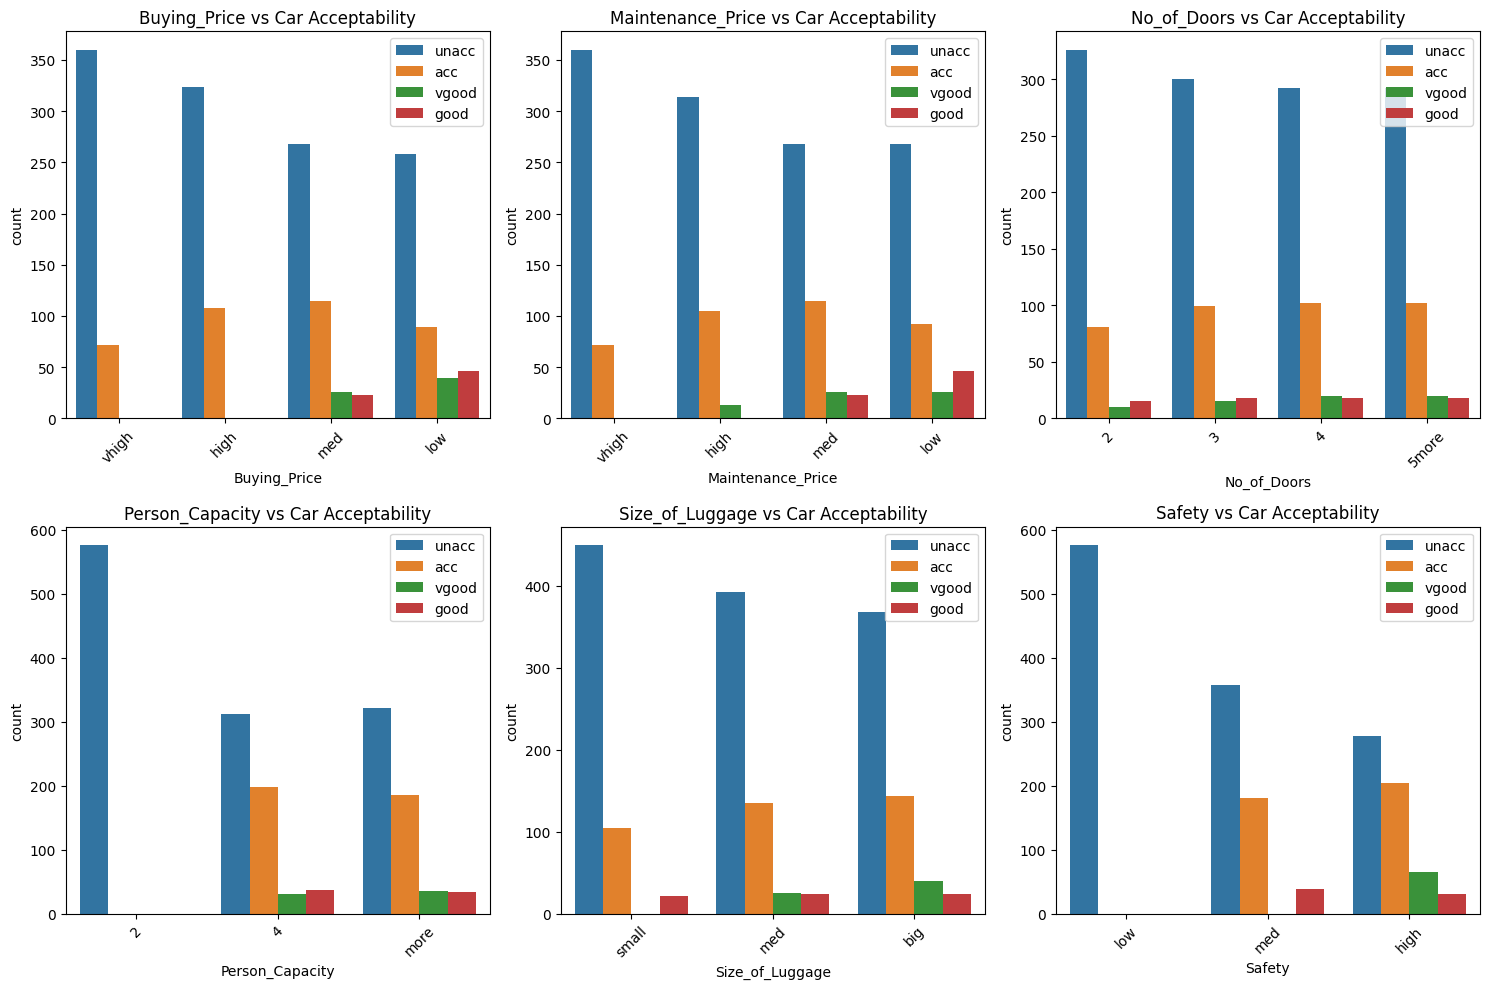

In [22]:
# Relationship between features and the target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['Buying_Price', 'Maintenance_Price', 'No_of_Doors', 'Person_Capacity', 'Size_of_Luggage', 'Safety']):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=feature, hue='Car_Acceptability', data=df)
    plt.title(f'{feature} vs Car Acceptability')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [23]:
## 3. Preprocessing and Feature Engineering ------------------------------
# Convert categorical variables to numerical using Label Encoding for the target and One-Hot Encoding for features
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_features = [col for col in categorical_cols if col != 'Car_Acceptability']

In [24]:
# Create transformers for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)
# Convert target to numerical using Label Encoder
le = LabelEncoder()
y = le.fit_transform(df['Car_Acceptability'])
print("\nEncoded target classes:", le.classes_)


Encoded target classes: ['acc' 'good' 'unacc' 'vgood']


In [25]:
# Seperating the data
X = df.drop('Car_Acceptability', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
## 4. Logistic Regression Construction--------------------
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

In [27]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Buying_Price',
                                                   'Maintenance_Price',
                                                   'No_of_Doors',
                                                   'Person_Capacity',
                                                   'Size_of_Luggage',
                                                   'Safety'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [28]:
# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

In [29]:
## 5. Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Model Evaluation Metrics:
Accuracy: 0.8931
Precision: 0.8926
Recall: 0.8931
F1-score: 0.8910


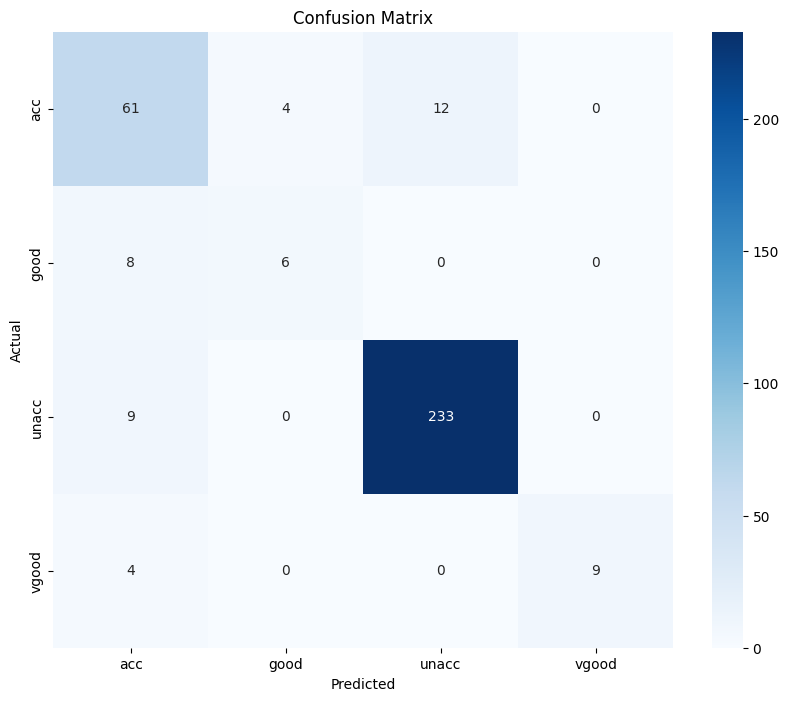

In [30]:
# Display confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

         acc       0.74      0.79      0.77        77
        good       0.60      0.43      0.50        14
       unacc       0.95      0.96      0.96       242
       vgood       1.00      0.69      0.82        13

    accuracy                           0.89       346
   macro avg       0.82      0.72      0.76       346
weighted avg       0.89      0.89      0.89       346



In [32]:
# ROC (Reveiver Operating Characters) curves for multiclass (one-vs-rest)
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(le.classes_):
    # Create binary labels for the current class (one-vs-rest)
    y_test_binary = (y_test == i).astype(int)
    y_pred_proba_class = y_pred_proba[:, i]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba_class)

    # Calculate AUC
    roc_auc = roc_auc_score(y_test_binary, y_pred_proba_class)

<Figure size 1200x800 with 0 Axes>

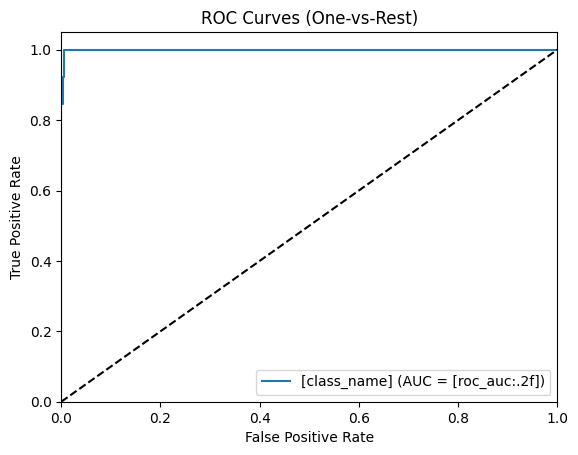

In [33]:
# Plot ROC curve
plt.plot(fpr, tpr, label=f'[class_name] (AUC = [roc_auc:.2f])')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

In [34]:
## 6. Hyperparameter Tuning and Model Optimization---------------
# Define hyperparameters for grid search
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__penalty': ['l1', 'l2']
}

In [35]:
# Perform grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Buying_Price',
                                                                          'Maintenance_Price',
                                                                          'No_of_Doors',
                                                                          'Person_Capacity',
                                                                          'Size_of_Luggage',
                                                                          'Safety'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [36]:
# Print the best parameters
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Cross-Validation Score: 0.915340344268299


In [37]:
# Evaluate the optimized model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nOptimized Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))


Optimized Model Evaluation:
Accuracy: 0.9104046242774566
Classification Report:
              precision    recall  f1-score   support

         acc       0.81      0.78      0.79        77
        good       0.75      0.64      0.69        14
       unacc       0.95      0.97      0.96       242
       vgood       0.86      0.92      0.89        13

    accuracy                           0.91       346
   macro avg       0.84      0.83      0.83       346
weighted avg       0.91      0.91      0.91       346



In [38]:
# Cross-validation of the final model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [0.74566474 0.84104046 0.73121387 0.76521739 0.62028986]
Mean CV Score: 0.7406852643042641
Standard Deviation: 0.07110913871382651


In [39]:
# Extract feature names from the preprocessor
one_hot_encoder = pipeline.named_steps['preprocessor'].transformers_[0][1]
feature_names = one_hot_encoder.get_feature_names_out(categorical_features)

In [40]:
# Get coefficients from the logistic regression model
coefficients = best_model.named_steps['classifier'].coef_

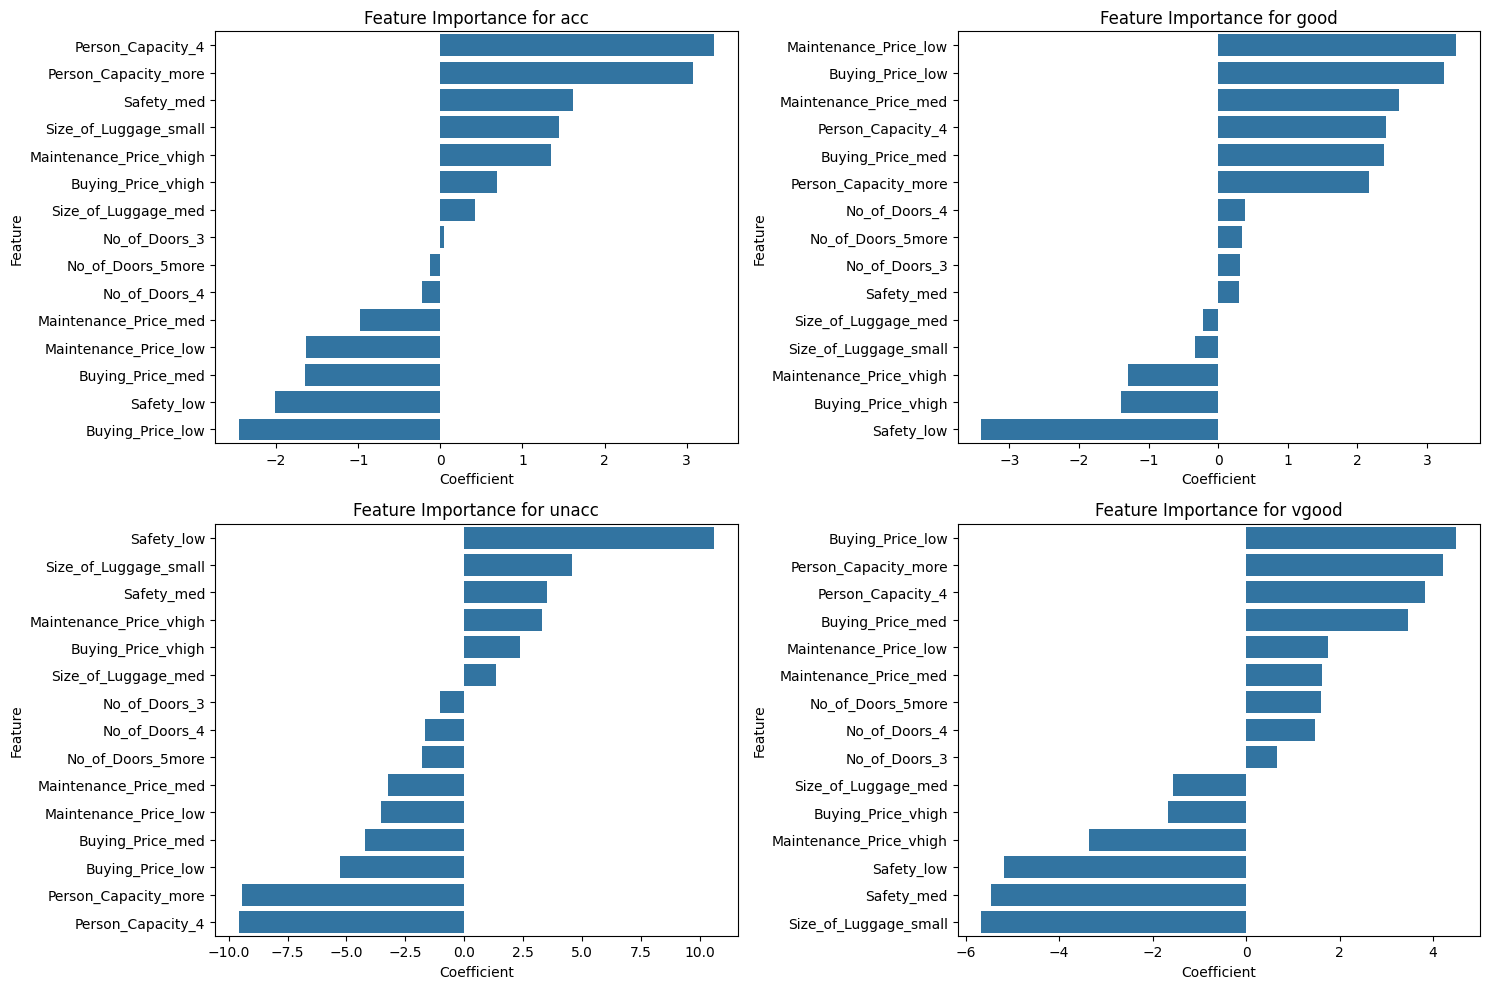

In [41]:
# Plot feature importance for each class
plt.figure(figsize=(15, 10))
for i, class_name in enumerate(le.classes_):
    plt.subplot(2, 2, i+1)
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients[i]
    })
    coef_df = coef_df.sort_values('Coefficient', ascending=False)

    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title(f'Feature Importance for {class_name}')
    plt.tight_layout()

plt.show()

In [49]:
"""
The Logistic Regression model achieved an accuracy of 91.04% after optimization.
The model performs best for predicting the following classes:
   - unacc (F1-score: 0.96)
   - vgood (F1-score: 0.89)
   - acc (F1-score: 0.79)
   - good (F1-score: 0.69)
"""

'\nThe Logistic Regression model achieved an accuracy of 91.04% after optimization.\nThe model performs best for predicting the following classes:\n   - unacc (F1-score: 0.96)\n   - vgood (F1-score: 0.89)\n   - acc (F1-score: 0.79)\n   - good (F1-score: 0.69)\n'